In [1]:
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from graphhelpers import plot_decision_regions

## Iris Dataset ##

In [2]:
iris = datasets.load_iris()

print iris.feature_names
print iris.target_names

X = iris.data[:, [2, 3]]
y = iris.target

print np.unique(y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 1 2]


### Cross Validation ###
[scikit-learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)

In [3]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=.3, random_state=0)

### Preprocessing ###

In [4]:
sc = StandardScaler()
sc.fit(XTrain)
XTrainStd = sc.transform(XTrain)
XTestStd = sc.transform(XTest)

# Perceptron #

In [5]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(XTrainStd, yTrain)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [6]:
yPred = ppn.predict(XTestStd)
print 'Misclassified samples: {0}'.format((yPred != yTest).sum())
print 'Total samples: {0}'.format(len(yPred))
print 'Misclassification error: {0:.3f}'.format(4./45.)
print 'Accuracy: {:.3f}'.format(1 - 4./45.)

Misclassified samples: 4
Total samples: 45
Misclassification error: 0.089
Accuracy: 0.911


In [7]:
# Using the sklearn.metrics.accuracy_score method
print 'Accuracy: {acc:.1f}%'.format(acc=accuracy_score(yPred, yTest)*100)

Accuracy: 91.1%


In [8]:
XCombinedStd = np.vstack((XTrainStd, XTestStd))
yCombined = np.hstack((yTrain, yTest))

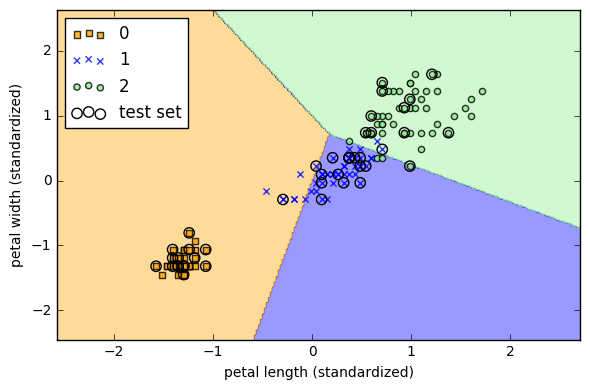

In [9]:
plt = plot_decision_regions(X=XCombinedStd, y=yCombined, classifier=ppn, testIndexRange=range(len(XTrainStd), len(XCombinedStd)))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()